<a href="https://colab.research.google.com/github/tiendat25052004/sentiment-analysis/blob/dev/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Load data

In [1]:
!pip install gdown

In [2]:
import gdown

url = 'https://drive.google.com/uc?id=1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy'
output = 'IMDB-Dataset.csv'

# Tải file về
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy
To: /content/IMDB-Dataset.csv
100%|██████████| 66.2M/66.2M [00:04<00:00, 15.6MB/s]


'IMDB-Dataset.csv'

In [3]:
import pandas as pd

df = pd.read_csv('IMDB-Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

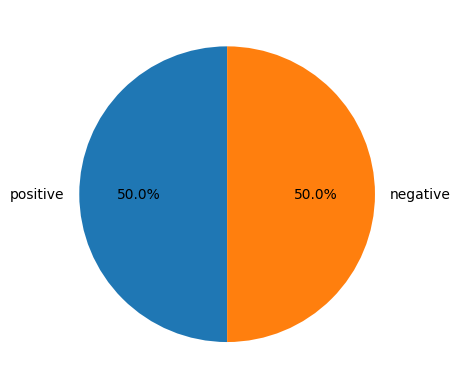

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_distribution(df):
    freq_pos = len(df[df['sentiment'] == 'positive'])
    freq_neg = len(df[df['sentiment'] == 'negative'])
    data = [freq_pos, freq_neg]
    labels = ['positive', 'negative']
    plt.pie(x=data, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.show()

plot_sentiment_distribution(df)

## 1. Clean data

```
# This is formatted as code
```



In [6]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.4 MB/s eta 0:00:00


In [7]:
import re
import string
import nltk
from bs4 import BeautifulSoup
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Tải các tài nguyên cần thiết
nltk.download('stopwords')
nltk.download('wordnet')

stop = set(stopwords.words('english'))

def expand_contractions(text):
    return contractions.fix(text) # Mở rộng từ viết tắt trong văn bản, ví dụ: I don't care -> I do not care

def preprocess_text(text):
    wl = WordNetLemmatizer()
    soup = BeautifulSoup(text, "html.parser")  # Xoá thẻ HTML
    text = soup.get_text()
    text = expand_contractions(text)  # Mở rộng contractions
    text = re.sub(r'\.(?=\S)', '. ', text)  # Thêm dấu cách sau dấu chấm
    text = re.sub(r'http\S+', '', text)  # Xoá URL
    text = "".join([word.lower() for word in text if word not in string.punctuation])  # Xoá dấu câu
    text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()])  # Lemmatize
    return text

df['review'] = df['review'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-7-71a5c94d7894>:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")  # Xoá thẻ HTML


,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive


## 2. Split dataset and Vectorize text

In [8]:
df

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,going disagree previous comment side maltin on...,negative


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

def split_data(df):
    label_encode = LabelEncoder()
    y_data = label_encode.fit_transform(df['sentiment'])
    x_data = df['review']
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

def vectorize_text(x_train, x_test):
    tfidf_vectorizer = TfidfVectorizer(max_features=10000)
    tfidf_vectorizer.fit(x_train)
    x_train_encoded = tfidf_vectorizer.transform(x_train)
    x_test_encoded = tfidf_vectorizer.transform(x_test)
    return x_train_encoded, x_test_encoded

x_train, x_test, y_train, y_test = split_data(df)
x_train_encoded, x_test_encoded = vectorize_text(x_train, x_test)

## 3. Build and train model

### 3.1 Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def train_decision_tree(x_train_encoded, y_train, x_test_encoded, y_test):
    dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt_classifier.fit(x_train_encoded, y_train)
    y_pred = dt_classifier.predict(x_test_encoded)
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [11]:
dt_accuracy = train_decision_tree(x_train_encoded, y_train, x_test_encoded, y_test)
dt_accuracy

0.729

### 3.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def train_random_forest(x_train_encoded, y_train, x_test_encoded, y_test):
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(x_train_encoded, y_train)
    y_pred = rf_classifier.predict(x_test_encoded)
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [ ]:
rf_accuracy = train_random_forest(x_train_encoded, y_train, x_test_encoded, y_test)
rf_accuracy

## 3.3 XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

def train_xgboost(x_train_encoded, y_train, x_test_encoded, y_test):
    # Tạo DataLoader cho XGBoost
    dtrain = xgb.DMatrix(x_train_encoded, label=y_train)
    dtest = xgb.DMatrix(x_test_encoded, label=y_test)

    # Cài đặt tham số cho mô hình XGBoost
    params = {
        'objective': 'binary:logistic',  # Bài toán phân loại nhị phân
        'max_depth': 5,                   # Độ sâu tối đa của cây
        'eta': 0.5,                       # Tốc độ học
        'eval_metric': 'logloss'          # Đánh giá theo log loss
    }

    # Huấn luyện mô hình
    model = xgb.train(params, dtrain, num_boost_round=100)

    # Dự đoán trên tập test
    y_pred = model.predict(dtest)
    y_pred_binary = [1 if i > 0.5 else 0 for i in y_pred]  # Chuyển đổi xác suất sang nhãn

    # Tính toán độ chính xác
    accuracy = accuracy_score(y_test, y_pred_binary)
    return accuracy

In [ ]:
xgb_accuracy = train_xgboost(x_train_encoded, y_train, x_test_encoded, y_test)
xgb_accuracy